In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
plt.rcParams.update({'figure.figsize': (10, 6), 'font.size': 12})
sns.set_style('whitegrid')

In [5]:

#Defining a dtype map for the mixed‐type columns:
dtype_map = {
    'zip3': 'string',            # ZIP3 codes sometimes parse as int/str
    'teacher_prefix': 'string'   # ensure prefixes stay strings
}

#Reading with your dtype map:
accounts = pd.read_csv('account.csv', dtype=dtype_map)

In [7]:
#Preview rows
accounts.head(10)

#Structure & null-counts
accounts.info()

#Summary statistics (incl. object counts)
accounts.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2855587 entries, 0 to 2855586
Data columns (total 8 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   accountid                   int64  
 1   city                        object 
 2   state                       object 
 3   zip3                        string 
 4   is_teacher                  float64
 5   teacher_prefix              string 
 6   teacher_teach_for_america   float64
 7   teacher_ny_teaching_fellow  float64
dtypes: float64(3), int64(1), object(2), string(2)
memory usage: 174.3+ MB


,accountid,city,state,zip3,is_teacher,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow
count,2.855587e+06,414258,1815328,1291006,2.526916e+06,423629,423664.000000,423664.000000
unique,NaN,17871,61,976,NaN,6,NaN,NaN
top,NaN,New York,CA,606,NaN,Mrs.,NaN,NaN
freq,NaN,15050,375025,28605,NaN,206580,NaN,NaN
mean,1.427794e+06,NaN,NaN,NaN,1.753129e-01,NaN,0.036992,0.007759
std,8.243371e+05,NaN,NaN,NaN,3.802346e-01,NaN,0.188741,0.087740
min,1.000000e+00,NaN,NaN,NaN,0.000000e+00,NaN,0.000000,0.000000
25%,7.138975e+05,NaN,NaN,NaN,0.000000e+00,NaN,0.000000,0.000000
50%,1.427794e+06,NaN,NaN,NaN,0.000000e+00,NaN,0.000000,0.000000
75%,2.141690e+06,NaN,NaN,NaN,0.000000e+00,NaN,0.000000,0.000000


In [9]:
#Count nulls per column
accounts.isnull().sum().sort_values(ascending=False)

city                          2441329
teacher_prefix                2431958
teacher_teach_for_america     2431923
teacher_ny_teaching_fellow    2431923
zip3                          1564581
state                         1040259
is_teacher                     328671
accountid                           0
dtype: int64

In [11]:
#teacher_prefix: NaN ⇒ 'none'
accounts['teacher_prefix'] = accounts['teacher_prefix'].fillna('none')

#Drop any rows with no city, state AND zip3
accounts = accounts.dropna(subset=['city','state','zip3'], how='all')

In [13]:
#Boolean flags should be 0/1 ints
bool_cols = ['is_teacher','teacher_teach_for_america','teacher_ny_teaching_fellow']
for c in bool_cols:
    accounts[c] = accounts[c].fillna(0).astype(int)

In [15]:
#States uppercase
accounts['state'] = accounts['state'].str.upper()

#Zip3 as zero-padded strings
accounts['zip3'] = accounts['zip3'].astype('string').str.zfill(3)

#teacher_prefix lowercase
accounts['teacher_prefix'] = accounts['teacher_prefix'].str.lower()

In [17]:
dups = accounts['accountid'].duplicated().sum()
print(f'Duplicate accountid rows: {dups}')
# If >0: decide drop or inspect

Duplicate accountid rows: 0


In [19]:
accounts.info()
accounts.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 1831670 entries, 3 to 2855586
Data columns (total 8 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   accountid                   int64 
 1   city                        object
 2   state                       object
 3   zip3                        string
 4   is_teacher                  int64 
 5   teacher_prefix              string
 6   teacher_teach_for_america   int64 
 7   teacher_ny_teaching_fellow  int64 
dtypes: int64(4), object(2), string(2)
memory usage: 125.8+ MB


,accountid,city,state,zip3,is_teacher,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow
3,4,NaN,NY,<NA>,1,ms.,0,0
11,12,Flushing,NY,113,1,ms.,0,0
13,14,New York,NY,100,1,ms.,0,0
15,16,New York,NY,100,1,mrs.,0,0
17,18,NaN,NY,103,1,mr.,0,0


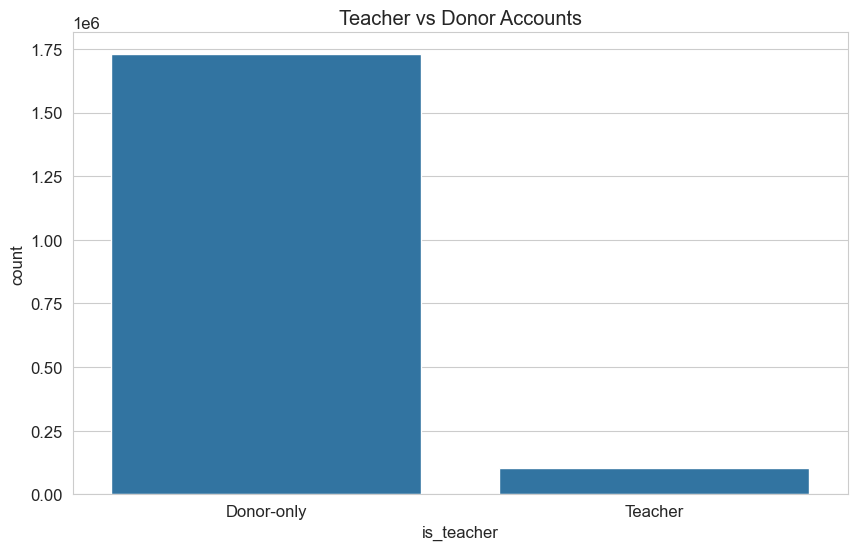

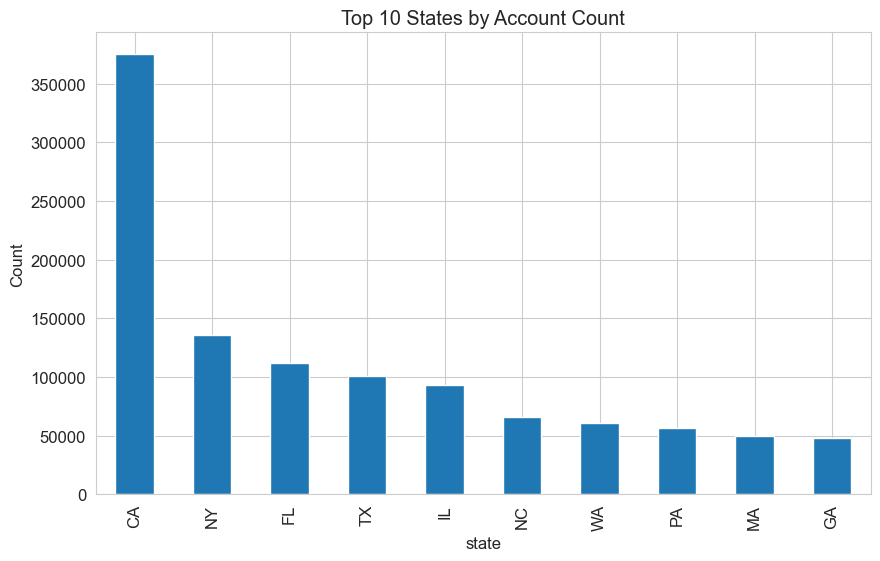

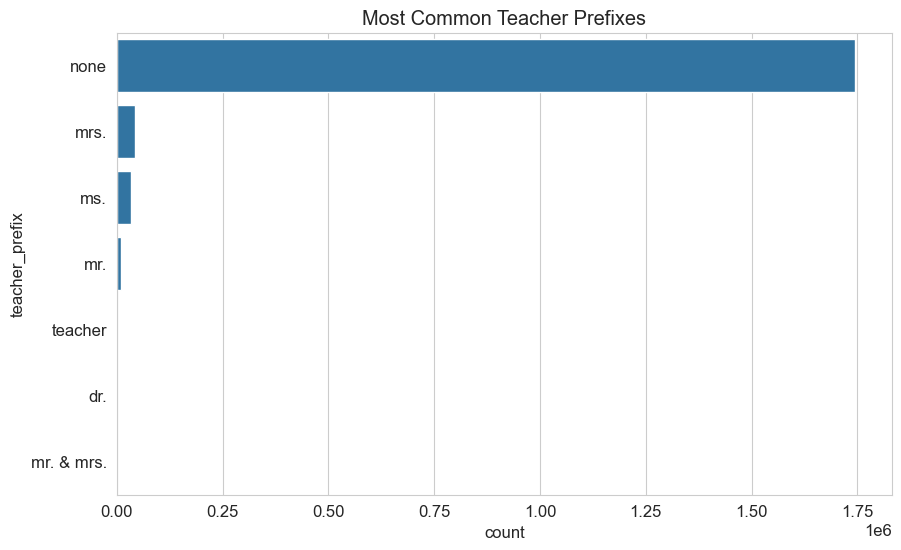

teacher_teach_for_america rate: 0.26%


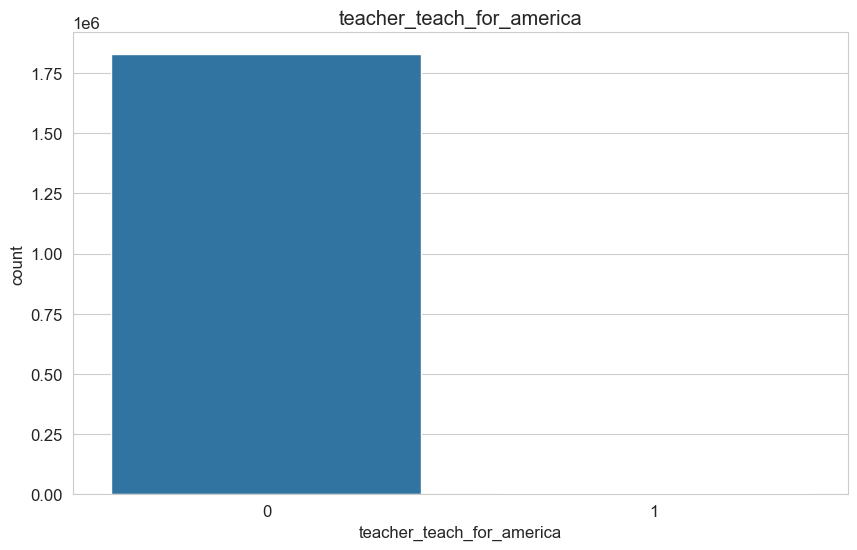

teacher_ny_teaching_fellow rate: 0.04%


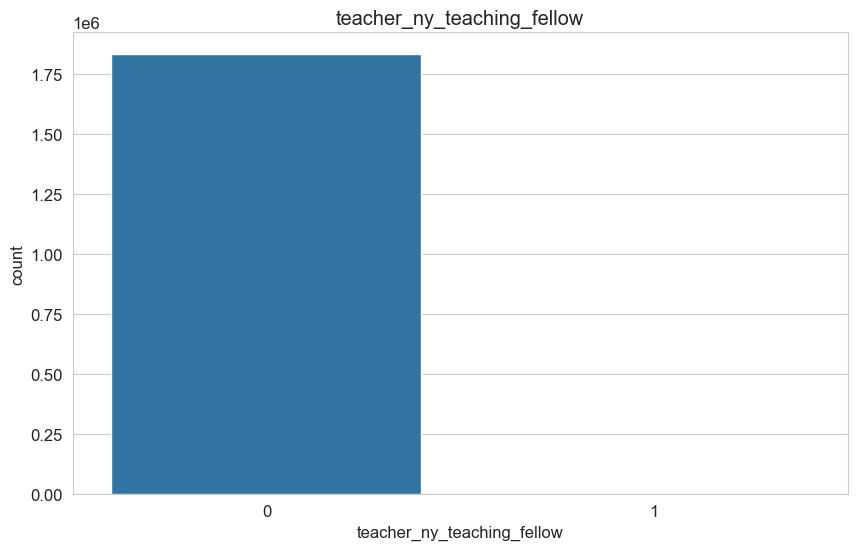

In [21]:
sns.set_style('whitegrid')

#Teacher vs Donor
sns.countplot(x='is_teacher', data=accounts)
plt.xticks([0,1], ['Donor-only','Teacher'])
plt.title('Teacher vs Donor Accounts')
plt.show()

#Top 10 States
top_states = accounts['state'].value_counts().nlargest(10)
top_states.plot(kind='bar')
plt.title('Top 10 States by Account Count')
plt.ylabel('Count')
plt.show()

#Teacher Prefixes
order = accounts['teacher_prefix'].value_counts().index[:8]
sns.countplot(y='teacher_prefix', data=accounts, order=order)
plt.title('Most Common Teacher Prefixes')
plt.show()

#Teach For America & NY Fellows rates
for col in ['teacher_teach_for_america','teacher_ny_teaching_fellow']:
    rate = accounts[col].mean()
    print(f'{col} rate: {rate:.2%}')
    sns.countplot(x=col, data=accounts)
    plt.title(col)
    plt.show()

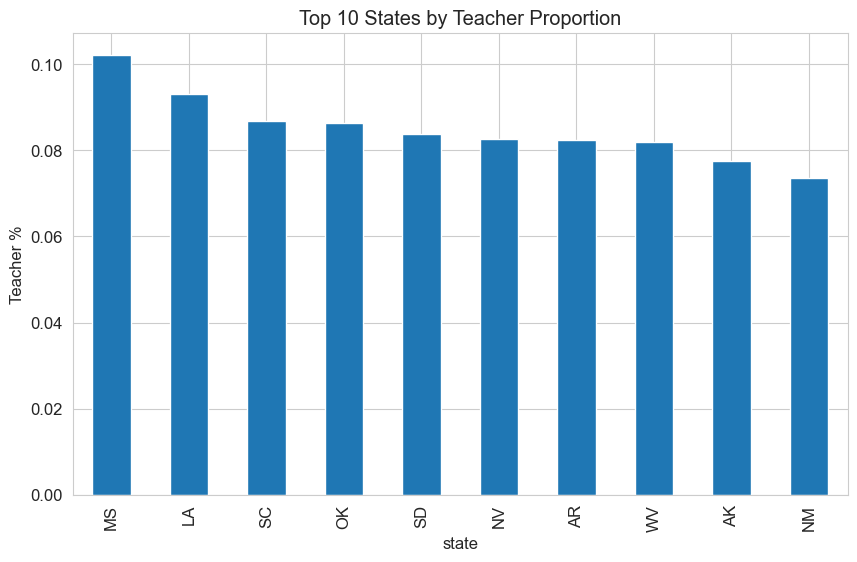

is_teacher,0,1
state,,
AA,0.984615,0.015385
AE,0.998208,0.001792
AK,0.922517,0.077483
AL,0.935304,0.064696
AP,0.980695,0.019305


In [23]:
#% Teachers by State
state_teacher_pct = (
    accounts
    .groupby('state')['is_teacher']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
state_teacher_pct.plot(kind='bar')
plt.ylabel('Teacher %')
plt.title('Top 10 States by Teacher Proportion')
plt.show()

#Crosstab sample
pd.crosstab(accounts['state'], accounts['is_teacher'], normalize='index').head()

In [25]:
#One-hot encode categorical fields
cat_feats = ['state','teacher_prefix']
accounts_ohe = pd.get_dummies(accounts[cat_feats], drop_first=True)

#Merge back if you need IDs
accounts_ohe['accountid'] = accounts['accountid']

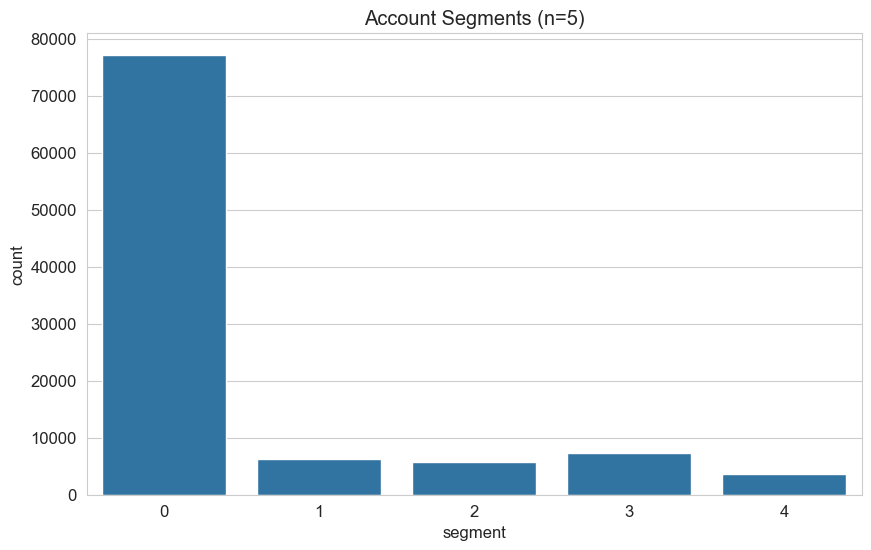

In [27]:
from sklearn.cluster import KMeans

#Sample for speed
sample = accounts_ohe.sample(50000, random_state=42).drop('accountid', axis=1)

#Fit KMeans
kmeans = KMeans(n_clusters=5, random_state=42).fit(sample)
sample['segment'] = kmeans.labels_

#Assign segments to full DF
accounts['segment'] = kmeans.predict(accounts_ohe.drop('accountid',axis=1))

#Visualize segment sizes
sns.countplot(x='segment', data=accounts.sample(100000))
plt.title('Account Segments (n=5)')
plt.show()

In [28]:
accounts.to_csv('accounts_cleaned.csv', index=False)

In [29]:
project = pd.read_csv('project.csv')

In [32]:
donation = pd.read_csv('donation.csv')

In [34]:
school = pd.read_csv('school.csv')

In [35]:
account = pd.read_csv('account.csv',dtype={5: str}) #requires data type specification for column 5

In [39]:
# Quick summary of school
school.head()
school.columns

Index(['schoolid', 'ncesid', 'latitude', 'longitude', 'city', 'state', 'zip',
       'metro', 'district', 'county', 'charter', 'magnet', 'year_round',
       'nlns', 'kipp', 'charter_ready_promise'],
      dtype='object')

In [41]:
# We’ll need to decide whether to drop or fill any missing values before analysis.
school.isna().sum()

schoolid                     0
ncesid                    6466
latitude                     0
longitude                    0
city                       318
state                        0
zip                          2
metro                    13729
district                    33
county                       5
charter                      0
magnet                       0
year_round                   0
nlns                         0
kipp                         0
charter_ready_promise        0
dtype: int64

In [43]:
# Understand whether schools are urban, suburban, or rural. Help identify geographic patterns.
school['metro'].value_counts()

metro
urban       23478
suburban    22969
rural       13030
Name: count, dtype: int64

In [45]:
# See how common special school types are. We can check if these schools receive more or less funding.
school['charter'].value_counts()
school['magnet'].value_counts()

magnet
0    69461
1     3745
Name: count, dtype: int64

In [47]:
# Identify which states have a higher proportion of charter schools or other school types. Useful for understanding regional disparities.
school.groupby('state')['charter'].mean()

state
AK    0.036900
AL    0.000900
AR    0.045263
AZ    0.202365
CA    0.130465
CO    0.120061
CT    0.041931
DC    0.432331
DE    0.139303
FL    0.146789
GA    0.101380
HI    0.103846
IA    0.002328
ID    0.065708
IL    0.052599
IN    0.065954
KS    0.012835
KY    0.000000
LA    0.118774
La    0.000000
MA    0.065539
MD    0.055603
ME    0.014170
MI    0.126459
MN    0.116814
MO    0.038418
MS    0.001157
MT    0.000000
NC    0.066138
ND    0.000000
NE    0.000000
NH    0.056940
NJ    0.074031
NM    0.116608
NV    0.090737
NY    0.064548
OH    0.105045
OK    0.019231
OR    0.079208
PA    0.091333
RI    0.090196
SC    0.050427
SD    0.000000
TN    0.041931
TX    0.067242
UT    0.133256
VA    0.002957
VT    0.000000
WA    0.002571
WI    0.083679
WV    0.000000
WY    0.007194
Name: charter, dtype: float64

In [49]:
# School data can merge with project data to examine whether different types of schools have different project success or donation levels
pd.merge(project, school, on='schoolid')

,projectid,teacheracctid,schoolid,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,...,zip,metro,district,county,charter,magnet,year_round,nlns,kipp,charter_ready_promise
0,1,1,1,Other,Applied Learning,NaN,NaN,Supplies,highest poverty,Grades 6-8,...,11207.0,urban,New York City Dept Of Ed,Kings (Brooklyn),0,1,0,0,0,0
1,2,2,2,Literacy,Literacy & Language,NaN,NaN,Books,highest poverty,Grades 9-12,...,10065.0,NaN,New York City Dept Of Ed,New York (Manhattan),0,0,0,0,0,0
2,3,3,3,Early Development,Applied Learning,NaN,NaN,Supplies,moderate poverty,Grades 3-5,...,10075.0,NaN,New York City Dept Of Ed,New York (Manhattan),0,1,0,0,0,0
3,4,4,4,History & Geography,History & Civics,NaN,NaN,Supplies,high poverty,Grades PreK-2,...,10009.0,urban,New York City Dept Of Ed,New York (Manhattan),0,0,0,0,0,0
4,5,5,5,Other,Applied Learning,NaN,NaN,Supplies,highest poverty,Grades PreK-2,...,10032.0,urban,New York City Dept Of Ed,New York (Manhattan),0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203282,1203283,423661,23077,Mathematics,Math & Science,NaN,NaN,Supplies,high poverty,Grades 9-12,...,76179.0,urban,Eagle Mtn-Saginaw Ind Sch Dist,Tarrant,0,0,0,0,0,0
1203283,1203284,423662,19642,Character Education,Applied Learning,Extracurricular,Applied Learning,Supplies,highest poverty,Grades 3-5,...,32960.0,urban,School Dist Of Indian River Co,Indian River,0,0,0,0,0,0
1203284,1203285,423663,38545,Early Development,Applied Learning,Health & Wellness,Health & Sports,Supplies,highest poverty,Grades PreK-2,...,2908.0,urban,Rhode Island Dept Of Education,Providence,1,0,0,0,0,0
1203285,1203286,394817,22913,Mathematics,Math & Science,Applied Sciences,Math & Science,Technology,high poverty,Grades 3-5,...,66040.0,rural,Prairie View Unif Sch Dist 362,Linn,0,0,0,0,0,0


In [ ]:
from datetime import datetime
from scipy.stats import skew

In [ ]:
donation= pd.read_csv('donation.csv')
donation.head(10)

In [ ]:
unique_values = donation['payment_method'].unique()
print (unique_values)

In [ ]:
sns.countplot(data=donation, x='payment_method')
plt.title('Frequency of payment methods')
plt.xticks(rotation=90)  
plt.tight_layout()       
plt.show()
#credit card and No Cash Received payments are the most frequent

In [ ]:
donation_totals = donation.groupby('payment_method')['donation_total'].sum()
donation_totals.plot(kind='pie', figsize=(3.5, 3.5), ylabel= '')
plt.title('Sum of Donations by Payment Method')
plt.show()
#credit card and cashless payments are by far the greatest % of total donations in both frequency and total value

In [ ]:
#are creditcard/cashless only the greatest bc they're the most convenient? 
    #how big is the AVERAGE donation in each category, that tells you if theres actually leverage...
    #to change something eg. encourage a certain donation method
#is donor acct id recurring? 
#look at if getting a thank you packaage made people more likely to repeat donate**

In [ ]:
donation_averages_by_pmt_method = donation.groupby('payment_method')['donation_total'].mean()
donation_averages_by_pmt_method.plot(kind='bar', figsize=(8, 5))  
plt.title('Mean value of donations by payment method')
#almost_home, check, and double impact have larget mean donation size
#credit card and NCR are among lowest mean payment sizes, but still make up most of donations bc freq is highest

In [ ]:
donation_mode = donation.groupby('payment_method')['donation_total'].agg(pd.Series.median)
donation_mode.plot(kind='bar', figsize=(8, 5))  
# insightful. Almost_home and double_match have the highest mean/avg donation values
# BUT, theyre among the least frequent, so the super high median of AHM pulls up the average
# but the mean is kept way closer to check and double impact. interesting
# probably not that important as an outlier bc still makes up such a small % of donation freq & $sum donations

In [ ]:
# does getting thank you packet make recurring donors?
#first, find repeat donors in sequential order. Then see if they got thank you's. compare those who didnt to those who did
#needed chatgpt to help me out pretty heavy with this one:
# Count how many times each donor donated
donation_counts = donation.groupby('donoracctid').size().reset_index(name='num_donations')
#if they donated more than once:
donation_counts['repeat'] = (donation_counts['num_donations'] > 1).astype(int)
# Merge with thank you packet:
packet_info = donation.groupby('donoracctid')['thank_you_packet_mailed'].max().reset_index()
# Merge both
donor_summary = pd.merge(donation_counts[['donoracctid', 'repeat']], packet_info, on='donoracctid')
# Group by whether they got the packet and get repeat rates
repeat_rates = donor_summary.groupby('thank_you_packet_mailed')['repeat'].mean()
print(repeat_rates)
# of all donors who DIDN'T receive a thank you, 24% were recurring donors
# better stated, 24% of ppl who didnt get a thank you donated again
# 48% of ppl who did get a thank you donated again. that's significant.

In [ ]:
donation_totals_by_giving_page = donation.groupby('giving_page_type')['donation_total'].sum()
donation_totals_by_giving_page.plot(kind='pie', figsize=(3.5, 3.5), ylabel= '', autopct='%1.1f%%') #chat helped me with the labels here  
plt.title('Sum of Donations by giving page type')
plt.show()
#doesnt appear that donating from a campaign or teacher makes a hgue difference. Most donations are just random acts i guess

In [ ]:
donation['giving_page_type'] = donation['giving_page_type'].fillna('none')
unique_values = donation['giving_page_type'].unique()
print (unique_values)

In [ ]:
sns.countplot(data=donation, x='giving_page_type')
plt.title('Giving page type frequencies')
plt.xticks(rotation=90)  
plt.tight_layout()       
plt.show()
#none is most common, and also makes up 61% of dollar total

In [ ]:
donation_averages_by_landing_page = donation.groupby('giving_page_type')['donation_total'].mean()
donation_averages_by_landing_page.plot(kind='bar', figsize=(8, 5), title= 'Mean donation by landing page type')  
# mean donations are highest from giving campaigns
# teacher campaigns have a lower mean donation value than 'none'. thats interesting
# maybe bc teacher campaigns are like more grassroots and probably attract less wealthy donors with less means to give?

In [ ]:
donation_mode_GPT = donation.groupby('giving_page_type')['donation_total'].agg(pd.Series.median)
donation_mode_GPT.plot(kind='bar', figsize=(8, 5), title= 'Median donation by landing page type')  
# mean donation is higher for campaign, but median donation is hgiher for teacher campaigns. Why?
# Campaign donations are super suuuuuper positive skewed.
#most campaign donations cluster around a low number, then sometimes there will be huge donations that pull tail to the right
#teacher donations are more tightly clustered around median, with fewer huge donation outliers

In [ ]:
#proving above conjectures (chatgpt helped:))
#top 10 highest campaogns are like $25k to $100k
#top10 highest teahcers are only up to $24k
top_10_campaign = donation[donation['giving_page_type'] == 'campaign'] \
    .sort_values(by='donation_total', ascending=False) \
    .head(10)

top_10_teacher = donation[donation['giving_page_type'] == 'teacher'] \
    .sort_values(by='donation_total', ascending=False) \
    .head(10)

print("Top 10 highest donations from Campaign:")
print(top_10_campaign[['donation_total', 'giving_page_type']])

print("\nTop 10 highest donations from Teacher:")
print(top_10_teacher[['donation_total', 'giving_page_type']])

In [ ]:
#lets see if I can show skew from that. could be cool.looked a bunch at stack.ex and chatgpt also for the error
plt.figure(figsize=(4, 4))
sns.boxplot(data=donation, x='giving_page_type', y='donation_total')
plt.title('donation distribution')
plt.xlabel('donation type')
plt.ylabel('donation total')
plt.yscale('log')
plt.tight_layout()
plt.show()

#not sure what that error is for but seems like this shows the skew I was going for pretty good so whatever
#can see the higher and wider distribution of campaign, vs teacher is all y axis clustered.